In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch
import requests
import json
from bs4 import BeautifulSoup
from PIL import Image
from urllib.request import urlopen
from mplsoccer import Pitch, add_image, FontManager
import LanusStats as ls
sofascore = ls.SofaScore()
from urllib.error import HTTPError

In [2]:
partido_sofascore = sofascore.get_match_data('https://www.sofascore.com/football/match/jaguares-de-cordoba-atletico-nacional/gxcsvMK#id:12528726')
partido_sofascore

{'event': {'tournament': {'name': 'Primera A, Clausura',
   'slug': 'primera-a-clausura',
   'category': {'name': 'Colombia',
    'slug': 'colombia',
    'sport': {'name': 'Football', 'slug': 'football', 'id': 1},
    'id': 274,
    'country': {'alpha2': 'CO',
     'alpha3': 'COL',
     'name': 'Colombia',
     'slug': 'colombia'},
    'flag': 'colombia',
    'alpha2': 'CO'},
   'uniqueTournament': {'name': 'Primera A, Clausura',
    'slug': 'primera-a-clausura',
    'primaryColorHex': '#002c6d',
    'secondaryColorHex': '#00afcf',
    'category': {'name': 'Colombia',
     'slug': 'colombia',
     'sport': {'name': 'Football', 'slug': 'football', 'id': 1},
     'id': 274,
     'country': {'alpha2': 'CO',
      'alpha3': 'COL',
      'name': 'Colombia',
      'slug': 'colombia'},
     'flag': 'colombia',
     'alpha2': 'CO'},
    'userCount': 20457,
    'id': 11536,
    'country': {},
    'hasPerformanceGraphFeature': False,
    'hasEventPlayerStatistics': True,
    'displayInverseHomeA

In [3]:
nombre_local, nombre_visit = sofascore.get_team_names('https://www.sofascore.com/football/match/jaguares-de-cordoba-atletico-nacional/gxcsvMK#id:12528726')
nombre_local

'Jaguares de Córdoba'

In [5]:
match_momentum= sofascore.get_match_momentum('https://www.sofascore.com/football/match/jaguares-de-cordoba-atletico-nacional/gxcsvMK#id:12528726')
match_momentum

,minute,value
0,1.0,5
1,2.0,10
2,3.0,11
3,4.0,10
4,5.0,-9
...,...,...
87,87.0,-36
88,88.0,-3
89,89.0,-3
90,90.0,-2


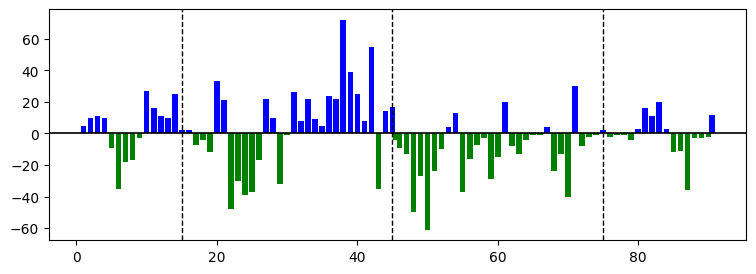

In [6]:
fig, ax = plt.subplots(figsize=(9,3))
match_momentum_local = match_momentum[match_momentum['value'] > 0]
match_momentum_visit = match_momentum[match_momentum['value'] < 0]

plt.bar(match_momentum_local.minute, match_momentum_local.value, color='blue')
plt.bar(match_momentum_visit.minute, match_momentum_visit.value, color='green')

# Líneas verticales punteadas para momentos clave (opcional, por ejemplo, minuto 45, etc.)
ax.axvline(x=45, color='black', linestyle='--', linewidth=1)
ax.axvline(x=15, color='black', linestyle='--', linewidth=1)
ax.axvline(x=75, color='black', linestyle='--', linewidth=1)

# Añadir la línea horizontal en el valor 0
ax.axhline(0, color='black', linewidth=1.2)


In [7]:
mapa_calor_jug_vis = sofascore.get_player_heatmap('https://www.sofascore.com/football/match/jaguares-de-cordoba-atletico-nacional/gxcsvMK#id:12528726', player='Kevin Parra')

Mapa calor visitante

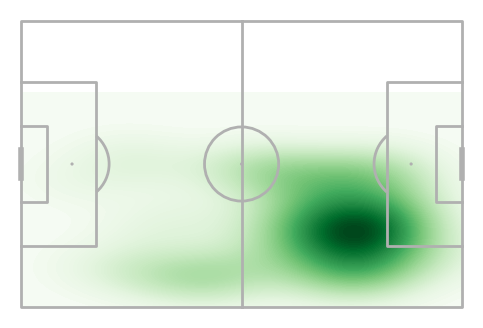

In [8]:
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(9, 4))

# Colormap verde
cmap = 'Greens'  # Cambiar el cmap a 'Greens'

# Dibujar el campo
pitch = Pitch(pitch_type='opta')
pitch.draw(ax=ax)

# Graficar el mapa de calor
pitch.kdeplot(mapa_calor_jug_vis.x, mapa_calor_jug_vis.y, ax=ax,
              levels=100,
              shade=True,
              zorder=-1,
              shade_lowest=True,
              cmap=cmap)  # Usar el colormap 'Greens' para tonos verdes

# Invertir el eje Y si es necesario
plt.gca().invert_yaxis()

# Mostrar el gráfico
plt.show()


Mapa calor local

In [9]:
mapa_calor_jug_loc = sofascore.get_player_heatmap('https://www.sofascore.com/football/match/jaguares-de-cordoba-atletico-nacional/gxcsvMK#id:12528726', player='Pablo Rojas')

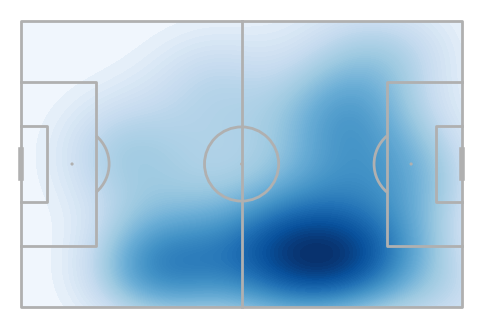

In [10]:
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(9, 4))

# Colormap verde
cmap = 'Blues'  # Cambiar el cmap a 'Greens'

# Dibujar el campo
pitch = Pitch(pitch_type='opta')
pitch.draw(ax=ax)

# Graficar el mapa de calor
pitch.kdeplot(mapa_calor_jug_loc.x, mapa_calor_jug_loc.y, ax=ax,
              levels=100,
              shade=True,
              zorder=-1,
              shade_lowest=True,
              cmap=cmap)  # Usar el colormap 'Greens' para tonos verdes

# Invertir el eje Y si es necesario
plt.gca().invert_yaxis()

# Mostrar el gráfico
plt.show()


SACAR JUFADORES DESTACADOS

In [11]:
df_local = sofascore.get_players_match_stats('https://www.sofascore.com/football/match/jaguares-de-cordoba-atletico-nacional/gxcsvMK#id:12528726')[0]
df_visit = sofascore.get_players_match_stats('https://www.sofascore.com/football/match/jaguares-de-cordoba-atletico-nacional/gxcsvMK#id:12528726')[1]

In [14]:
df_local['percentage_pass'] = (df_local['accuratePass'] / df_local['totalPass']) * 100
df_visit['percentage_pass'] = (df_visit['accuratePass'] / df_visit['totalPass']) * 100

In [88]:
df_filtrado = df_visit[['shortName','touches','totalPass','keyPass','percentage_pass']]
df_filtrado 

,shortName,touches,totalPass,keyPass,percentage_pass
0,H. Castillo,50.0,39.0,NaN,79.487179
1,A. Román,48.0,35.0,3.0,82.857143
2,J. F. Aguirre,55.0,48.0,NaN,83.333333
3,W. Tesillo,58.0,51.0,NaN,86.274510
4,Á. Angulo,53.0,40.0,NaN,85.000000
5,K. Toscano,61.0,56.0,1.0,92.857143
6,J. Zapata,82.0,72.0,NaN,90.277778
7,D. Asprilla,43.0,30.0,1.0,93.333333
8,E. Cardona,47.0,35.0,3.0,80.000000
9,K. Parra,49.0,36.0,2.0,86.111111


In [15]:
lista_mayores = ['duelWon', 'touches', 'keyPass','percentage_pass']
nombre_mayores_local = []
valor_mayores_local = []
nombre_mayores_visit = []
valor_mayores_visit = []

for i in range(len(lista_mayores)):
    nombre = df_local.sort_values(by=lista_mayores[i], ascending=False)[['name', lista_mayores[i]]].values[0][0]
    valor = df_local.sort_values(by=lista_mayores[i], ascending=False)[['name', lista_mayores[i]]].values[0][1]
    nombre_mayores_local.append(nombre)
    valor_mayores_local.append(valor)

for i in range(len(lista_mayores)):
    nombre = df_visit.sort_values(by=lista_mayores[i], ascending=False)[['name', lista_mayores[i]]].values[0][0]
    valor = df_visit.sort_values(by=lista_mayores[i], ascending=False)[['name', lista_mayores[i]]].values[0][1]
    nombre_mayores_visit.append(nombre)
    valor_mayores_visit.append(valor)

nombre_mayores_local, valor_mayores_local

(['Darwin Andrade', 'Santiago Guzmán', 'Santiago Guzmán', 'Daniel Padilla'],
 [6.0, 63.0, 3.0, 100.0])

In [16]:
nombre_mayores_visit, valor_mayores_visit

(['Dairon Asprilla', 'Juan Zapata', 'Andrés Román', 'Marino Hinestroza'],
 [8.0, 82.0, 3.0, 100.0])

In [17]:
def sacar_spines(ax):
    ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

SACAR ESCUDOS

In [54]:
idlocal = partido_sofascore['event']['homeTeam']['id']
idvisit = partido_sofascore['event']['awayTeam']['id']

In [55]:
imagen1 = Image.open(urlopen(f'https://api.sofascore.app/api/v1/team/{idlocal}/image'))
imagen2 = Image.open(urlopen(f'https://api.sofascore.app/api/v1/team/{idvisit}/image'))

SACAR INFO DEL PARTIDO

In [66]:
goleslocal = partido_sofascore['event']['homeScore']['normaltime']
golesvisit = partido_sofascore['event']['awayScore']['normaltime']

torneo = partido_sofascore['event']['season']['name']
fecha = partido_sofascore['event']['roundInfo']['round']

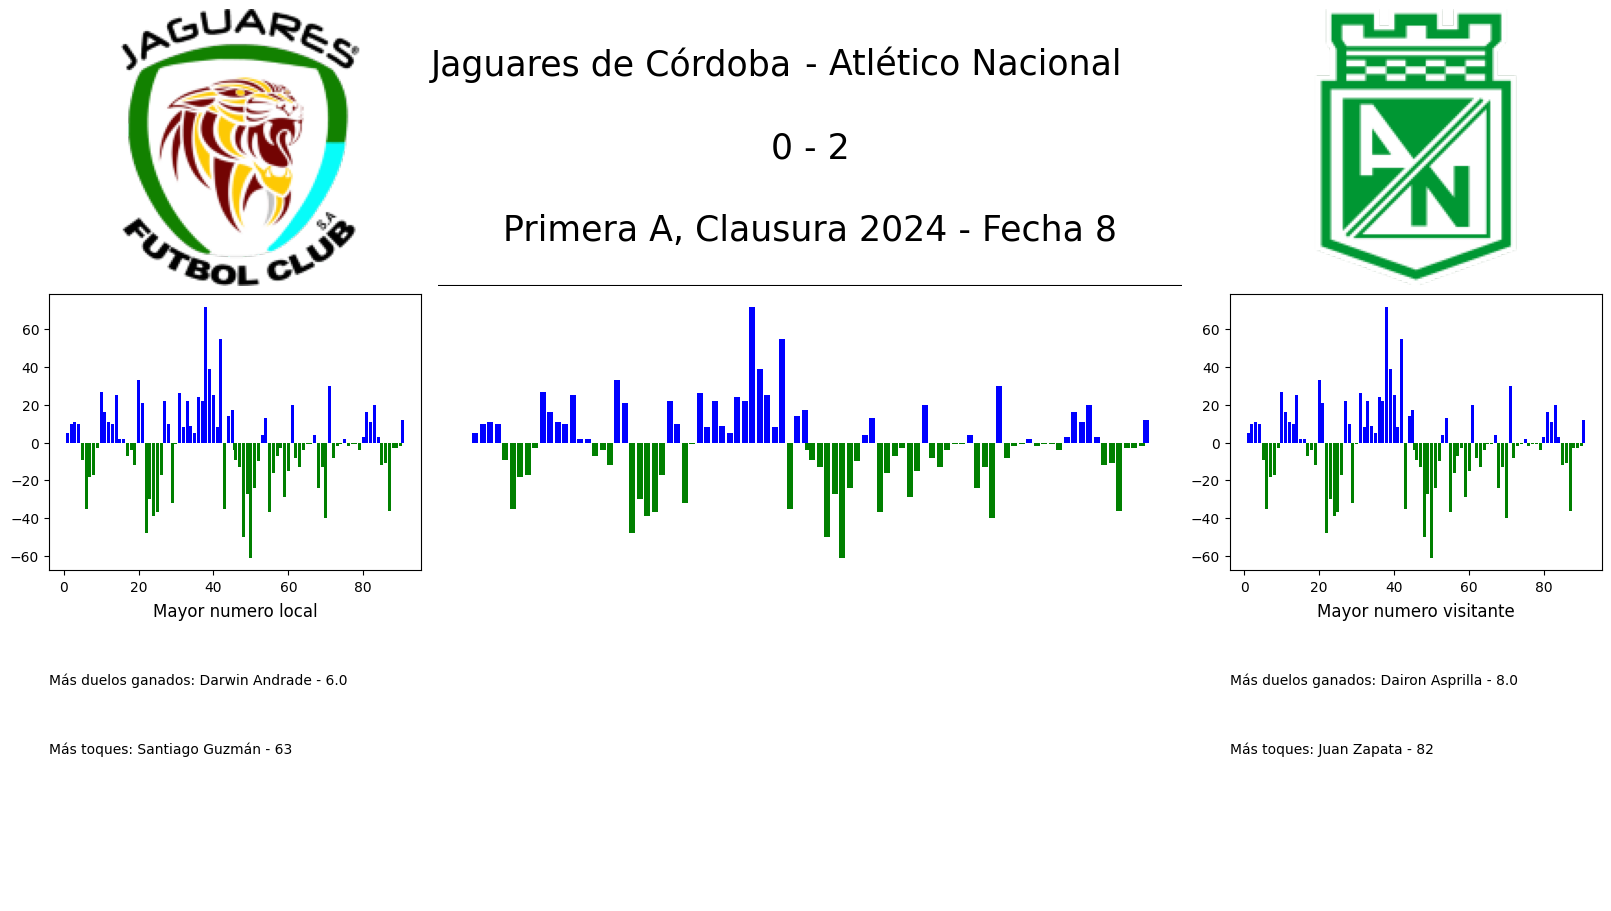

In [70]:
fig = plt.figure(figsize=(16,9),constrained_layout=True)
gs = fig.add_gridspec(nrows=3,ncols=4)
fig.set_facecolor('white')

#Escudo local
ax1 = fig.add_subplot(gs[0,0:1])
ax1.imshow(imagen1)
sacar_spines(ax1)

#Escudo visitante
ax2 = fig.add_subplot(gs[0,3:4])
ax2.imshow(imagen2)
sacar_spines(ax2)


ax3 = fig.add_subplot(gs[0,1:3])
ax3.text(.475,.8,f'{nombre_local}', ha='right', va='center', size=25)
ax3.text(.525,.8,f'{nombre_visit}', ha='left', va='center', size=25)
ax3.text(.5,.8,'-', ha='center', va='center', size=25)
ax3.text(.5,.5,f'{goleslocal} - {golesvisit}', ha='center', va='center', size=25)
ax3.text(.5,.2,f'{torneo} - Fecha {fecha}', ha='center', va='center', size=25)
ax3.axhline(0, color='black')
sacar_spines(ax3)


ax5 = fig.add_subplot(gs[1:2,:1])
match_momentum_local = match_momentum[match_momentum['value'] > 0]
match_momentum_visit = match_momentum[match_momentum['value'] < 0]
plt.bar(match_momentum_local.minute, match_momentum_local.value, color='blue')
plt.bar(match_momentum_visit.minute, match_momentum_visit.value, color='green')
# Líneas verticales punteadas para momentos clave (opcional, por ejemplo, minuto 45, etc.)
ax.axvline(x=45, color='black', linestyle='--', linewidth=1)
ax.axvline(x=15, color='black', linestyle='--', linewidth=1)
ax.axvline(x=75, color='black', linestyle='--', linewidth=1)
# Añadir la línea horizontal en el valor 0
ax.axhline(0, color='black', linewidth=1.2)


ax6 = fig.add_subplot(gs[1:2,3:])
match_momentum_local = match_momentum[match_momentum['value'] > 0]
match_momentum_visit = match_momentum[match_momentum['value'] < 0]
plt.bar(match_momentum_local.minute, match_momentum_local.value, color='blue')
plt.bar(match_momentum_visit.minute, match_momentum_visit.value, color='green')
# Líneas verticales punteadas para momentos clave (opcional, por ejemplo, minuto 45, etc.)
ax.axvline(x=45, color='black', linestyle='--', linewidth=1)
ax.axvline(x=15, color='black', linestyle='--', linewidth=1)
ax.axvline(x=75, color='black', linestyle='--', linewidth=1)
# Añadir la línea horizontal en el valor 0
ax.axhline(0, color='black', linewidth=1.2)


ax7 = fig.add_subplot(gs[1:2,1:3])
match_momentum_local = match_momentum[match_momentum['value'] > 0]
match_momentum_visit = match_momentum[match_momentum['value'] < 0]
plt.bar(match_momentum_local.minute, match_momentum_local.value, color='blue')
plt.bar(match_momentum_visit.minute, match_momentum_visit.value, color='green')
# Líneas verticales punteadas para momentos clave (opcional, por ejemplo, minuto 45, etc.)
ax.axvline(x=45, color='black', linestyle='--', linewidth=1)
ax.axvline(x=15, color='black', linestyle='--', linewidth=1)
ax.axvline(x=75, color='black', linestyle='--', linewidth=1)
# Añadir la línea horizontal en el valor 0
ax.axhline(0, color='black', linewidth=1.2)
sacar_spines(ax7)


ax10 = fig.add_subplot(gs[2:,:1])
ax10.set_title('Mayor numero local')
ax10.text(0,.8, f'Más duelos ganados: {nombre_mayores_local[0]} - {valor_mayores_local[0]}', ha='left', va='center')
ax10.text(0,.55, f'Más toques: {nombre_mayores_local[1]} - {int(valor_mayores_local[1])}', ha='left', va='center')
sacar_spines(ax10)

ax9 = fig.add_subplot(gs[2:,3:])
ax9.set_title('Mayor numero visitante')
ax9.text(0,.8, f'Más duelos ganados: {nombre_mayores_visit[0]} - {valor_mayores_visit[0]}', ha='left', va='center')
ax9.text(0,.55, f'Más toques: {nombre_mayores_visit[1]} - {int(valor_mayores_visit[1])}', ha='left', va='center')
sacar_spines(ax9)

In [16]:
jugador_destacado_local = df_local[['name','rating']].sort_values(by='rating', ascending=False).iloc[0]['name']
jugador_destacado_visit = df_visit[['name','rating']].sort_values(by='rating', ascending=False).iloc[0]['name']
id_jug_local = df_local[df_local['name'] == jugador_destacado_local].id.values[0]
id_jug_visit = df_visit[df_visit['name'] == jugador_destacado_visit].id.values[0]
try:
    imagen_jug_local = Image.open(urlopen(f'https://api.sofascore.app/api/v1/team/{id_jug_local}/image'))
except HTTPError:
    imagen_jug_local = ''

try:
    imagen_jug_visit = Image.open(urlopen(f'https://api.sofascore.app/api/v1/team/{id_jug_visit}/image'))
except HTTPError:
    imagen_jug_visit = ''   

In [17]:
df_jug_local = df_local[df_local['name'] == jugador_destacado_local]
df_jug_visit = df_visit[df_visit['name'] == jugador_destacado_visit]


In [18]:
df_jug_local.columns

Index([                      'name',                  'firstName',
                         'lastName',                       'slug',
                        'shortName',                   'position',
                     'jerseyNumber',                  'userCount',
                               'id',                    'country',
              'marketValueCurrency',       'dateOfBirthTimestamp',
                      'shirtNumber',               'jerseyNumber',
                         'position',                 'substitute',
                        'totalPass',               'accuratePass',
                   'totalLongBalls',          'accurateLongBalls',
                       'goalAssist',                 'totalCross',
                    'accurateCross',                 'aerialLost',
                        'aerialWon',                   'duelLost',
                          'duelWon',              'challengeLost',
                     'totalContest',                 'wonConte

In [19]:
idlocal = partido_sofascore['homeTeam']['id']
idvisit = partido_sofascore['awayTeam']['id']

In [20]:
imagen1 = Image.open(urlopen(f'https://api.sofascore.app/api/v1/team/{idlocal}/image'))
imagen2 = Image.open(urlopen(f'https://api.sofascore.app/api/v1/team/{idvisit}/image'))

In [21]:
goleslocal = partido_sofascore['homeScore']['normaltime']
golesvisit = partido_sofascore['awayScore']['normaltime']


In [22]:
partido_sofascore

{'tournament': {'name': 'Primera B Nacional',
  'slug': 'primera-b-nacional',
  'category': {'name': 'Argentina',
   'slug': 'argentina',
   'sport': {'name': 'Football', 'slug': 'football', 'id': 1},
   'id': 48,
   'country': {'alpha2': 'AR', 'name': 'Argentina'},
   'flag': 'argentina',
   'alpha2': 'AR'},
  'uniqueTournament': {'name': 'Primera Nacional',
   'slug': 'primera-nacional',
   'primaryColorHex': '#145286',
   'secondaryColorHex': '#27A4DE',
   'category': {'name': 'Argentina',
    'slug': 'argentina',
    'sport': {'name': 'Football', 'slug': 'football', 'id': 1},
    'id': 48,
    'country': {'alpha2': 'AR', 'name': 'Argentina'},
    'flag': 'argentina',
    'alpha2': 'AR'},
   'userCount': 9210,
   'id': 703,
   'country': {},
   'hasEventPlayerStatistics': False,
   'crowdsourcingEnabled': False,
   'hasPerformanceGraphFeature': False,
   'displayInverseHomeAwayTeams': False},
  'priority': 0,
  'competitionType': 1,
  'id': 5071},
 'season': {'name': 'Primera Nacion

In [23]:
torneo = partido_sofascore['season']['name']
fecha = partido_sofascore['roundInfo']['round']

In [24]:
f'{nombre_local} - {nombre_visit}'

'Estudiantes de Río Cuarto - Deportivo Madryn'

In [25]:
def sacar_spines(ax):
    ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

In [26]:
lista_estadisticas_partido = ['Expected goals', 'Ball possession', 'Total shots', 'Shots on target', 'Corner kicks', 'Fouls', 'Yellow cards', 'Red cards', 'Counter attacks', 'Goalkeeper saves', 'Accurate passes', 'Duels won', 'Tackles', 'Interceptions', 'Clearances']
#lista_dashboard = ['Expected goals', 'Ball possession', 'Total shots', 'Shots on target', 'Corner kicks', 'Fouls', 'Tarjetas', 'Counter attacks', 'Goalkeeper saves', 'Accurate passes', 'Duels won', 'Acc. defensivas']
lista_valores_partido_local = []
lista_valores_partido_visit = []

for i in range(len(lista_estadisticas_partido)):
    valor = estadisticas_partido[estadisticas_partido['name'] == lista_estadisticas_partido[i]]['home'].values[0]
    lista_valores_partido_local.append(valor)

for i in range(len(lista_estadisticas_partido)):
    valor = estadisticas_partido[estadisticas_partido['name'] == lista_estadisticas_partido[i]]['away'].values[0]
    lista_valores_partido_visit.append(valor)


In [27]:
lista_valores_partido_visit

['0.50',
 '49%',
 '9',
 '3',
 '4',
 '9',
 '3',
 '0',
 '0',
 '1',
 '227 (73%)',
 '96',
 '7',
 '61',
 '12']

F
F


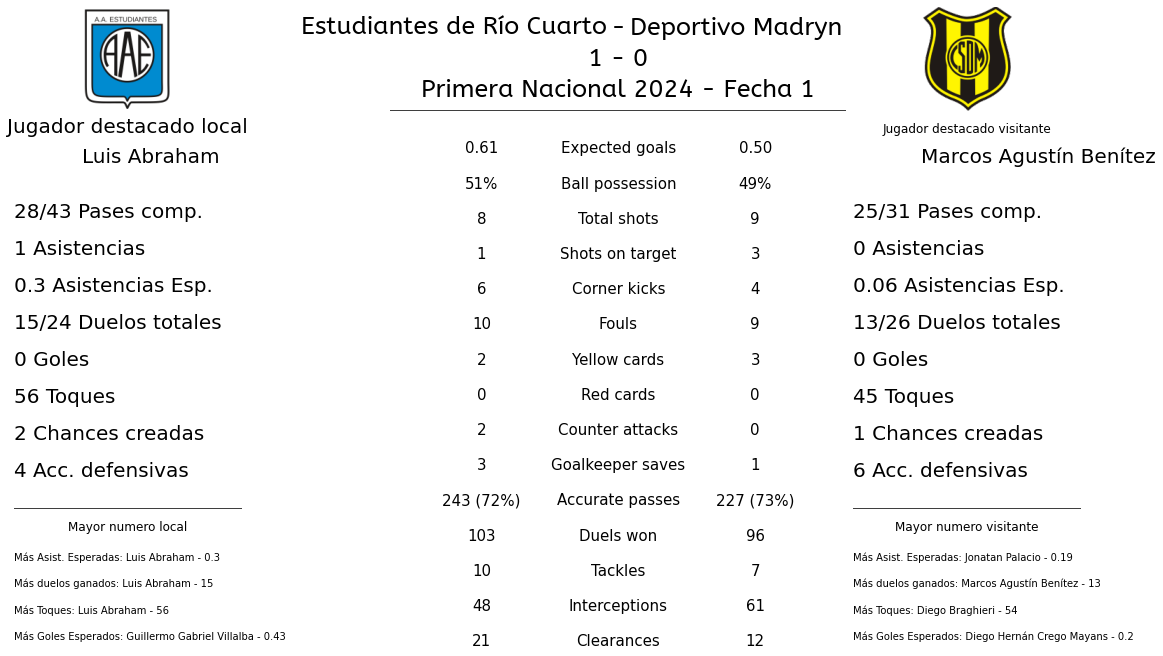

In [44]:
fig = plt.figure(figsize=(16,9),constrained_layout=True)
gs = fig.add_gridspec(nrows=5,ncols=4)
fig.set_facecolor('white')

#Escudo local
ax1 = fig.add_subplot(gs[0,0:1])
ax1.imshow(imagen1)
sacar_spines(ax1)

#Escudo visitante
ax2 = fig.add_subplot(gs[0,3:4])
ax2.imshow(imagen2)
sacar_spines(ax2)

ax3 = fig.add_subplot(gs[0,1:3])
ax3.text(.475,.8,f'{nombre_local}', ha='right', va='center', fontproperties=fuente1.prop, size=25)
ax3.text(.525,.8,f'{nombre_visit}', ha='left', va='center', fontproperties=fuente1.prop, size=25)
ax3.text(.5,.8,'-', ha='center', va='center', fontproperties=fuente1.prop, size=25)
ax3.text(.5,.5,f'{goleslocal} - {golesvisit}', ha='center', va='center', fontproperties=fuente1.prop, size=25)
ax3.text(.5,.2,f'{torneo} - Fecha {fecha}', ha='center', va='center', fontproperties=fuente1.prop, size=25)
ax3.axhline(0, color='black')
sacar_spines(ax3)


lista_estadisticas = ['totalPass', 'accuratePass', 'goalAssist', 'duelWon', 'duelLost', 'expectedAssists', 'keyPass', 'touches', 'goals', 'totalTackle', 'interceptionWon', 'totalClearance']
valores_jug_local = df_jug_local[lista_estadisticas].values
ax6 = fig.add_subplot(gs[1:4,:1])
ax6.set_title('Jugador destacado local', size=20)
if imagen_jug_local:
    ax_image2 = add_image(
                imagen_jug_local, fig, left=0.113, bottom=0.67, width=0.055, height=0.055
            )
else:
    print('F')
ax6.text(.3,.95,f'{jugador_destacado_local}', ha='left', va='center', size=20)
ax6.text(0,.8,f'{int(valores_jug_local[0][1])}/{int(valores_jug_local[0][0])} Pases comp.', ha='left', va='center', size=20)
ax6.text(0,.7,f'{int(valores_jug_local[0][2])} Asistencias', ha='left', va='center', size=20)
ax6.text(0,.6,f'{float(valores_jug_local[0][5])} Asistencias Esp.', ha='left', va='center', size=20)
ax6.text(0,.5,f'{int(valores_jug_local[0][3])}/{int(valores_jug_local[0][4])+int(valores_jug_local[0][3])} Duelos totales', ha='left', va='center', size=20)
ax6.text(0,.4,f'{int(valores_jug_local[0][8])} Goles', ha='left', va='center', size=20)
ax6.text(0,.3,f'{int(valores_jug_local[0][7])} Toques', ha='left', va='center', size=20)
ax6.text(0,.2,f'{int(valores_jug_local[0][6])} Chances creadas', ha='left', va='center', size=20)
ax6.text(0,.1,f'{int(valores_jug_local[0][9])+int(valores_jug_local[0][10])+int(valores_jug_local[0][11])} Acc. defensivas', ha='left', va='center', size=20)
ax6.axhline(0, color='black')
sacar_spines(ax6)


ax10 = fig.add_subplot(gs[4:,:1])
ax10.set_title('Mayor numero local')
ax10.text(0,.8, f'Más Asist. Esperadas: {nombre_mayores_local[0]} - {valor_mayores_local[0]}', ha='left', va='center')
ax10.text(0,.55, f'Más duelos ganados: {nombre_mayores_local[1]} - {int(valor_mayores_local[1])}', ha='left', va='center')
ax10.text(0,.3, f'Más Toques: {nombre_mayores_local[2]} - {int(valor_mayores_local[2])}', ha='left', va='center')
ax10.text(0,.05, f'Más Goles Esperados: {nombre_mayores_local[3]} - {valor_mayores_local[3]}', ha='left', va='center')
sacar_spines(ax10)

ax7 = fig.add_subplot(gs[1:,1:3])
i = 1.08
for n in range(len(lista_estadisticas_partido)):
    ax7.text(.5, i-.1, lista_estadisticas_partido[n], ha='center', va='center', size=15)
    i-=.07

i = 1.08
for n in range(len(lista_valores_partido_local)):
    ax7.text(.2, i-.1, lista_valores_partido_local[n], ha='center', va='center', size=15)
    i-=.07

i = 1.08
for n in range(len(lista_valores_partido_visit)):
    ax7.text(.8, i-.1, lista_valores_partido_visit[n], ha='center', va='center', size=15)
    i-=.07
sacar_spines(ax7)

#Equipo visitante
ax8 = fig.add_subplot(gs[1:4,3:])
ax8.set_title('Jugador destacado visitante')
valores_jug_visit = df_jug_visit[lista_estadisticas].values
if imagen_jug_visit:
    ax_image2 = add_image(
                imagen_jug_visit, fig, left=0.113, bottom=0.67, width=0.055, height=0.055
            )
else:
    print('F')
ax8.text(.3,.95,f'{jugador_destacado_visit}', ha='left', va='center', size=20)
ax8.text(0,.8,f'{int(valores_jug_visit[0][1])}/{int(valores_jug_visit[0][0])} Pases comp.', ha='left', va='center', size=20)
ax8.text(0,.7,f'{int(valores_jug_visit[0][2])} Asistencias', ha='left', va='center', size=20)
ax8.text(0,.6,f'{float(valores_jug_visit[0][5])} Asistencias Esp.', ha='left', va='center', size=20)
ax8.text(0,.5,f'{int(valores_jug_visit[0][3])}/{int(valores_jug_visit[0][4])+int(valores_jug_visit[0][3])} Duelos totales', ha='left', va='center', size=20)
ax8.text(0,.4,f'{int(valores_jug_visit[0][8])} Goles', ha='left', va='center', size=20)
ax8.text(0,.3,f'{int(valores_jug_visit[0][7])} Toques', ha='left', va='center', size=20)
ax8.text(0,.2,f'{int(valores_jug_visit[0][6])} Chances creadas', ha='left', va='center', size=20)
ax8.text(0,.1,f'{int(valores_jug_visit[0][9])+int(valores_jug_visit[0][10])+int(valores_jug_visit[0][11])} Acc. defensivas', ha='left', va='center', size=20)
ax8.axhline(0, color='black')
sacar_spines(ax8)

ax9 = fig.add_subplot(gs[4:,3:])
ax9.set_title('Mayor numero visitante')
ax9.text(0,.8, f'Más Asist. Esperadas: {nombre_mayores_visit[0]} - {valor_mayores_visit[0]}', ha='left', va='center')
ax9.text(0,.55, f'Más duelos ganados: {nombre_mayores_visit[1]} - {int(valor_mayores_visit[1])}', ha='left', va='center')
ax9.text(0,.3, f'Más Toques: {nombre_mayores_visit[2]} - {int(valor_mayores_visit[2])}', ha='left', va='center')
ax9.text(0,.05, f'Más Goles Esperados: {nombre_mayores_visit[3]} - {valor_mayores_visit[3]}', ha='left', va='center')
sacar_spines(ax9)